# Background
One of the most fundamental questions in biology which is yet unanswered is why does almost every organism use prettty much exclusively L-amino acids and D-sugars. Ribose is one of the most important of these D-sugars as it comprises the backbone of RNA, and its deoxy form for DNA. This project will be using molecular dynamics to try and discover preferential interactions between ribose and its precursors with nucleobases which could explain why only the right handed sugars are used in DNA and RNA. 

## What do we Mean by D and L?
Before we can delve into the world of thermodyanmics and molecular dynamics, we should first define the concept of chirality so we can get some kind of justifcation for why this matters. Two objects are said to be chrial when they cannot be superimposed on eachother with just rotation. Take the classic example of your hands. If you put both of your palms up and overlay your hands on top of eachother, you palms are facing the same direction, but now your thumbs are facing in opposite directions. If you flip on hand over, your thumbs are facing the same direction, but now your palms are facing different directions. Because there is no way to rotate your hands which cause them to be superimpoable, your hands are said to be chiral. This concept applies to any 3D object, including molecules. 
<br><br>
For this project, just how handedness is determined in molecules is not important, however chiral molecules are placed into two categories: "right-handed" or "D", or "left-handed" or "L". 

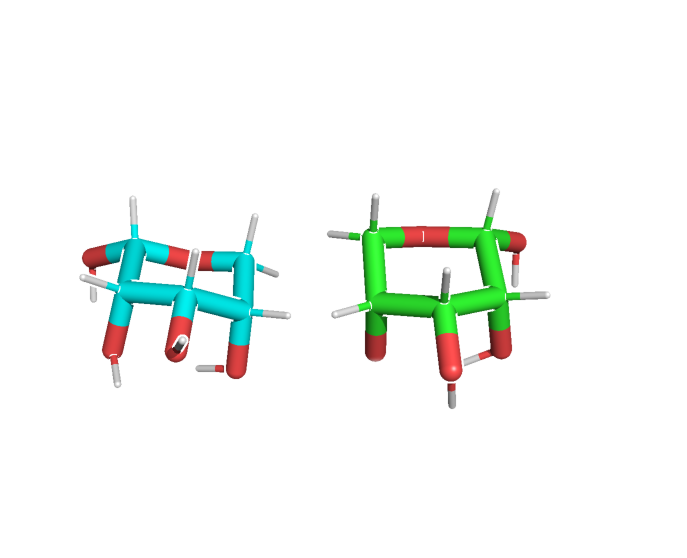 
<br><br>
Above we have D-Ribose on the right and L-ribose on the left. As you can see. The two molecules are facing the same way (the oxygens in the ring are both facing up, and all the hydroxyls are facing down), however the hydroxyls closest to the oxygen heteroatom are facing in opposite directions. In this case, this hydroxyl is analgous to our thumbs in the hand example. If we were to rotate one of the riboses so that the hydroxyls were facing the same direction, the three hydroxyls which were facing down, would now be facing up (just like our palms when we rotate our thumbs to line up), making these two molecules chiral. Two molecules with the exact same chemcial strucuture with the exception of being chiral are referred to as "enantiomers", so we can say that D and L Ribose are enantiomers. 

## Origin of Ribose
There are several possible explanations for the prebiotic origins of ribose, and more generally most simple sugars, ranging from various organic chemsitry mechanisms to coming from space. So far this project has been operating under the assumption that the formose reaction is responsible for creating simple sugars. The formose reaction is a simple polymerization of formaldehyde in the presence of a base and a divalent cation such as Calcium and Magnesium. This reaction has been shown to abiotically produce dozens of kinds of simple sugars including tetroses, pentoses, hexoses, and even bigger sugars. 

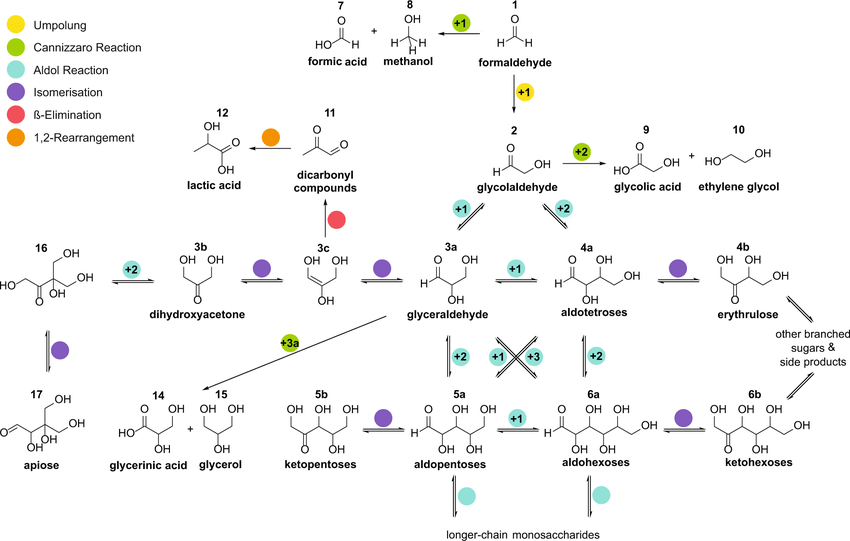
<br><br>
The image above shows a general outline as to how multicarbon sugars are generated via the formose reaction. It starts with formaldehyde which can be generated abiotically. This then undergoes several intermediate reactions before either polymerizing with itself or being added on to a growing carbohydrate chain. This reaction very qucikly generates a very diverse array of branched and unbranched carbohydrates with no specificity for chirality or hydroxyl positions. Ribose, regardless of chirality, only accounts for less than 1% of the carbohydrates generated from the formose reaction. 

## So, Why Ribose?
Becauase ribose has a less than 1% yield from the formose reaction, why is ribose used rather than any of the dozens of other products in the first place? Well, if we look at the structure of other pentoses in the first place we see something interesting. 

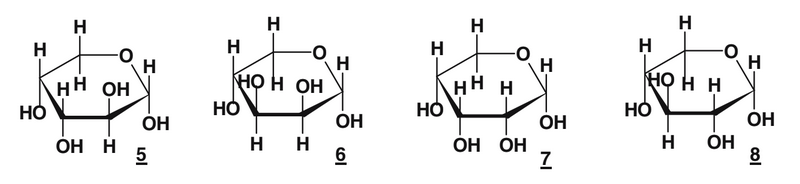
<br><br>
Pay attention to the orientations of the hydroxyl groups. We see that D-Ribose (number 7) is the only molecule which has its hydroxyl groups all on the same side. Ribose is theorized to be the sugar of choice because it has the highest potential to form the most hydrogen bonds at once with another molecule since its hydroxyls are all facing the same direction. 

## Enantiomeric Separation 
Enantiomeric Separation is, as the name implies, the process of separating two enantiomers. Usually this involves placing a racemic mixture of the two enanteriomers into some kind of interaction with a chiral substance so that it preferentially separates one enantiomer from another. However, since we are trying to examine the origins of homochriality in life, we cannot assume that some kind of chiral separator evolved yet so it isnt as simple as saying a stererospecific enzyme synthesized/destroyed/transported one sugar over the other.
<br><br>
One theory for how this could have happened prebiotically is that an external force such as an electric or magnetic field orientated the two racemates in the same direction. These enantiomers which are now facing the same direction, then had a difference in interaction with some kind of mineral surface due to the difference in their chirality. 
 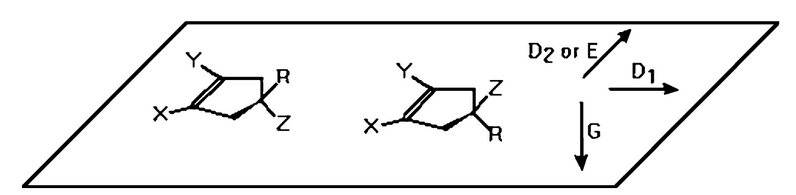
<br><br>
In the abscence of this external field, the chirality would not have made a difference since the enantiomers could simply rotate to achieve the same amount of interaction with an achrial surface. But because of the induced fixed orientation, this would cause the molecules to be unable to rotate, causing their chirality to produce a difference in interaction with the crystal. Very recently, an enantiomeric excess of ribo-aminooxazoline (RAO, a precursor to RNA) has been experimentally achived by cyrstalizing RAO on the surface of magnetite. 
<br><br>
There are many options for what kind of cystal surface can be used. Magnetite is a common mineral which produces a magnetic field. Organic crystals made of prebiotic organic compounds, including nucleobases, may form pro-chrial hydrogen bonding networks, which then could lead to enantiomeric separation. This is the type of cystal that we will be studying in the project (unless someone wants to try and introduce inorganic crystals into the project. Carbohydrates like to interact with cations so this may not be the worst idea). 

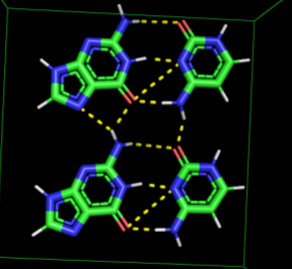

A guanine-cytosine mock-crystal structure. Hydrogen bonds denoted in yellow.


# Simuation Setup
The general idea of the sheet simulations is to test some molecules interacting with some kind of rigid sheet of molecules which represent a crystal. 

## Putting in the Crystal Structure
The config file has 5 sections for setting up the sheet:
* sheet height
    * Determines the number of copies of the crystal structure in the y direction 
* sheet width
    * Determines the number of copies in the x direction 
* crystal structure
    * The PDB file containing the unit cell of your desired sheet
    * This needs to be a PDB rather than an SDF as PDBs contain resiude infromation, most importantly resiude names. If you imported this as an SDF, every molecule in the cell would be loaded in as one resiude with name UNK
    * Note that this is not actually a formal "unit cell" where bonds extend beyond the crystal boundaries. You will need to be careful in setting up your unit cell to make sure that only full molecules are included in the boundaries as this program just tesselates the unit cell and will not fill in the bonds which cross cell boundaries. 
* mols in crystal
    * Because we are using small molecules, the molecule parameters for the forcefield are generated by GAFF. GAFF has its own molecule objects that it uses to generate parameters. These molecule objects are most easily loaded in by SDF files so you will need to also specifcy the sdfs of the molecules which are included in your crystal structure. 
* crystal resnames
    * These are the names of the residues within your crystal. This is here to make it easier to analyze later. Make sure that the names you specifcy here match with those in the analysis config. 

For the lists within the config, make sure that you do not separate with spaces, only commas. The config is parsed in as strings no matter what type of value you put in the config file. Lists are then created in the code separated by commas. Adding spaces will mess this up and everything will break.    

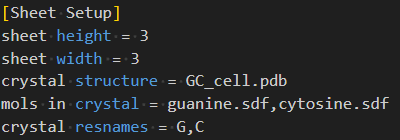

Example of the crystal set up config

### Loading in the Sheet Cell and Creating the sheet
Remember, this is loading in just the unit cell, not the individual molecules within the cell.
<br><br>
The code below simply loads in the cell specified by your PDB file, and saves it to the `mol` variable. It then also loads in the SDF files of the original molecules and stores them and the resiude names into `GAFF Molecule` objects and stores them in the `gaff_mols` list. This list is used later to generate paramteres for the small molecules using the generalized amber force field (GAFF).


In [ ]:
def load_sheet_cell(cell_name, cell_res_names, config):
    cell_name = config.get('Sheet Setup','crystal structure')
    cell_res_names = config.get('Sheet Setup','crystal resnames').split(',')

    mol = PDBFile(f'./molecules/{cell_name}')

    cell_mols = config.get('Sheet Setup','mols in crystal').split(',')

    gaff_mols = []

    for mol_name, resname in zip(cell_mols,cell_res_names):
        gaff_mol = Molecule.from_file(f'./molecules/{mol_name}', file_format='sdf')
        gaff_mol.name = resname
        gaff_mols.append(gaff_mol)

    return mol, gaff_mols

This function is executed in main, where unit_cell is the pdb file, and cell_mols are the GAFF Molecules containing the indivudal molecules within the cell:

In [ ]:
unit_cell, cell_mols = load_sheet_cell(cell_name, cell_res_names, config)

Before we get into making the sheet, we need to take a super quick aside about the OpenMM `Modeller` object. This object simply takes whatever postiions and topologies you give it, and stores them in the `Modeller` object. Positions are the 3D coordinates of a molecule, and topology objects describe the types of atoms and how they are connected. Both of these are needed in order to be added to the `Modeller`. This object can have molecules continuously added to it by passing in their positions and topologies or deleted from it until iit is ready to be used in the simulation. An empty modeller cannot be initialized, so instead what we do in main is initalize it with an arbitrary molecule and topology, and then delete it so we have an empty `Modeller` object before we add in any of our molecules: 

In [ ]:
    model = Modeller(test_mols[test_mol_names[0]]['topology'],test_mols[test_mol_names[0]]['positions'])
    model.delete(model.topology.atoms())

`model` can then be based into the functions where we create the molecules for the simulation.
<br><br>

To make the sheet we first take the positions and topology of the unit cell. We move the cell up by one angstrom to avoide colliding with the periodic boundary conditions. Next we obtain the x and y dimensions of the cell and add a buffer of one or two angstroms so that we can multiply the cell every x and y dimension. The double for loop first creates the height of the sheet of length `sh`, and then multiplies this line of unit cells by `sw` and adds them to the model. We then obtain the final dimensions of the sheet to allow us to define the periodic boundaries of the simulation based off of the sheet. 
<br><br>
This function returns a list containing the starting atom index of the sheet, and the ending atom index of the sheet so that the sheet can easily be indexed later, and the sheet x and y dimensions to apply the periodic boundary conditions. 


In [ ]:
def make_sheet(mol, model, config):
    sh = int(config.get('Sheet Setup','sheet height'))
    sw = int(config.get('Sheet Setup','sheet width'))

    sheet_mols_start = model.topology.getNumAtoms()

    pos = np.array(mol.getPositions(asNumpy=True)) * angstrom * 10
    pos[:,2] += 1 *  angstrom
    top = mol.getTopology()

    x_coords = pos[:,0]
    y_coords = pos[:,1]

    x_dimension = np.abs(np.max(x_coords)-np.min(x_coords)) + 2
    y_dimension = np.abs(np.max(y_coords)-np.min(y_coords)) + 1

    for i in range(sw):
        for j in range(sh):
            dx = i * x_dimension * angstrom
            dy = j * y_dimension * angstrom
            new_pos = pos.copy() * angstrom
            new_pos[:, 0] += dx
            new_pos[:, 1] += dy
            model.add(top, new_pos)

    sheet_pos = np.array(model.getPositions())*angstrom*10

    sheet_x_coords = sheet_pos[:,0]
    sheet_y_coords = sheet_pos[:,1]

    sheet_x_dim = np.abs(np.max(sheet_x_coords)-np.min(sheet_x_coords)) / 10 
    sheet_y_dim = np.abs(np.max(sheet_y_coords)-np.min(sheet_y_coords)) / 10 

    return[sheet_mols_start, model.topology.getNumAtoms()], sheet_x_dim, sheet_y_dim

The sheet is made with the following code in `main`:

In [ ]:
    sheet_indices = []
    sheet_index, sheet_x, sheet_y= make_sheet(unit_cell, model, config)
    sheet_indices.append(sheet_index)

A similar process is used for creating the molecules that we want to test.
<br><br>
Within the config file, we have three options for our test molecules:

* test molecules
    * The sdf files of the molecules that you wish to load in 
    * SDFs are used here rather than pdbs because we are only loading in one molecule so it doesnt matter that GAFF treats them as a single residue
    * However, we do need to manually assign them residue names since SDFs do not contain residue information 
* test resnames
    * The residue names that you wish to assign to your test molecules
    * Because we are loading in with SDFs, here is we manually assign the resiude names
    * Make sure that they are in the same order as they are in `test molecules`
* num of each mol
    * The number of each test molecule you wish to spawn in

The same spacing rules apply: no spaces, only commas.

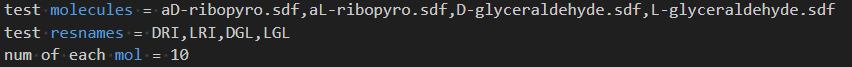

Example of the test mol config.
<br><br>
The molecules are loaded in with the following code:

In [ ]:
def load_test_mols(filenames, resnames):
    mols = {}
    for filename, resname in zip(filenames, resnames):
        mol = Molecule.from_file(f'./molecules/{filename}', file_format='sdf')
        mol.generate_conformers()
        conf = to_openmm(mol.conformers[0])
        top = mol.to_topology().to_openmm()
        top = md.Topology.from_openmm(top)
        top.residue(0).name = resname
        top = top.to_openmm()
        mols[filename] = {
            "mol":mol,
            "topology": top,
            "positions": conf,
            'resname': resname
        }

    return mols

The molecules are loaded in GAFF Molecule Objects with the SDFs rather than using a PDB. This is good as it easily allows us to crate parameters for the force field, however we also need to store residue information, which is what the `test resnames` section in the config file does. These residue names are passed in as resnames. The GAFF `Molecule` object, the resiude names, the positions, and the topology of the molecules are all stored in a dictionary so that they can be easily accessed later. Also, because these are initially loaded in as `Molecule` objects, we need to convert the positions and topologies to Openmm `topology` objects which is what the `.to_openmm(mol.conformers[0])` and `.to_topology().to_openmm()` methods do.
<br><br>
The molecules are then spawned into the `model` with the following two functions. We will start with explaining `spawn_test_mols` and will talk about `check_overlap` when we get there. 

In [ ]:
def check_overlap(pos, existing_molecules, boundaries):
    boundaries = np.asarray(boundaries) * angstrom * 10  #need *10 to convert from nm to angstrom
    for existing_pos in existing_molecules:
        dx = pos[0] - existing_pos[0]
        dy = pos[1] - existing_pos[1]
        dz = pos[2] - existing_pos[2]

        # account for periodic boundaries
        dx -= np.round(dx / boundaries[0][0]) * boundaries[0][0] 
        dy -= np.round(dy / boundaries[1][1]) * boundaries[1][1]
        dz -= np.round(dz / boundaries[2][2]) * boundaries[2][2] 

        if np.all(np.abs(dx) < 10) and np.all(np.abs(dy) < 10) and np.all(np.abs(dz) < 10):
            # The new molecule is within 1 nm in all dimensions of an existing molecule
            return True
        
    return False

def spawn_test_mols(test_mol_names, test_mols, num_test_mols, model, sheet_x, sheet_y, config):
    test_mols_start = model.topology.getNumAtoms()
    existing_molecules = []
    boundaries = [
        Vec3(sheet_x - 0.5, 0, 0),
        Vec3(0, sheet_y - 0.5, 0),
        Vec3(0, 0, 9.5)
    ]

    for num in range(num_test_mols):
        for mol_name in test_mol_names:
            pos = test_mols[mol_name]['positions']
            top = test_mols[mol_name]['topology']

            translation = np.array([np.random.uniform(boundaries[0][0]), np.random.uniform(boundaries[1][1]), np.random.uniform(boundaries[2][2])]) * nanometer
            pos_temp = translate_mol(pos, translation)
            pos_temp = rotate(pos_temp, np.deg2rad(np.random.randint(0, 360)), axis=np.random.choice(['x', 'y', 'z']))

            while check_overlap(pos_temp, existing_molecules, boundaries):
                translation = np.array([np.random.uniform(boundaries[0][0]), np.random.uniform(boundaries[1][1]), np.random.uniform(boundaries[2][2])]) * nanometer
                pos_temp = translate_mol(pos, translation)
                pos_temp = rotate(pos_temp, np.deg2rad(np.random.randint(0, 360)), axis=np.random.choice(['x', 'y', 'z']))

            existing_molecules.append(pos_temp)
            model.add(top, pos_temp)

    return [test_mols_start, model.topology.getNumAtoms()]


`spawn_test_mols` takes in test mol resnames that you assigned it and the molecule dictionary made previously. The molecules are spawned in with a double for loop, where the bottom loop iterates through all of the types of molecules you want, and the top iterates through how many of each you want. The positions and topologies of the current molecule are obtained, and it is randomly moved to a location within the periodic boundary box as definted by the sheet dimensions, and also randomly rotated. Its new random coordinates are compared to other molecules's positions and if they are not overlappting, then tts positions and topology get added to the `model`, and its positions also get added to the `existing_molecules` list. Once all the molecules are added, the function returns a list with containing the starting index of the test mols, and the ending index, similar to the sheet functions return.
<br><br>
`check_overlap` checks to make sure that the new molecule's positions are not overlapping with previous molecules. If the molecules are overlapping, when the simulation is initalized it will drive the potential energy way up because two things are in the same position, and the simulation will crash. To check if the new molecule is within any of the previously spawned molecules, the difference between all three dimensions is taken, and normalized relative to the periodic boundaries, and then compared. If any of the positions are within 1 nm of eachother, the check returns a True (meanining that the molecule is overlapping with another molecule), and the while loops does another iteration of randomly moving and rotating the molecule. 

## Creating the forcefield
The forcefield is an object which contains all the parameters for how certain bonds and interactions should behave. A large majority of them are made for big biomolecules such as proteins. Because our simulation here involves small molecules that are somwhat unusual, we need to use the Generalized Amber Forcefield or GAFF. GAFF is cool in that it can create parameters for small molecules so long as you supply them GAFF `Molecule` objects. The forcefield is initalized with the following code:


In [ ]:
 gaff = GAFFTemplateGenerator(molecules = molecules)

forcefield = ForceField('amber14-all.xml', 'tip3p.xml')
forcefield.registerTemplateGenerator(gaff.generator)



## Adding solvent, creating the system, and adding custom forces. 
Only a few more things need to be added to the simulatoin, first and foremost the solvent, and then periodic boundary conditions. The periodic box size, as discussed before, is definted by the sheet x and y dimensions, and an arbitrary z (height). The waters of the simulation are added in by the `addSolvent` method on the model, and the size of the water box added is also definted by the sheet dimensions. Finally period boundary conditions are applied:

In [ ]:
box_size = [
        Vec3(sheet_x+.2,0,0),
        Vec3(0,sheet_y+.2,0),
        Vec3(0,0,10)
    ] 

    model.addSolvent(forcefield=forcefield, model='tip3p', boxSize=Vec3(sheet_x, sheet_y, 9.95))
    model.topology.setPeriodicBoxVectors(box_size)

    system = forcefield.createSystem(model.topology,nonbondedMethod=PME, nonbondedCutoff=1*nanometer, constraints=HBonds)

An OpenMM `system` object contains the model which we just created (all the positions and topologies of the molecules that we want in our simulation), along with any forces that could act on these particles. Remember that we want our "crystal" to behave like a crystal -- rigid and unmoving. So to do this, we need to create a restraining force on only the crystal atoms. This restraining force behaves like a spring pulling the atoms back to whatever position we specifcy with a spring constant which we also specify:

In [ ]:
restraint = CustomExternalForce('k*((x-x0)^2+(y-y0)^2+(z-z0)^2)')
    system.addForce(restraint)
    restraint.addGlobalParameter('k', 100.0*kilojoules_per_mole/angstrom**2)
    restraint.addPerParticleParameter('x0')
    restraint.addPerParticleParameter('y0')
    restraint.addPerParticleParameter('z0')

    for start, stop in sheet_indices:
        for i in range(start, stop):
            restraint.addParticle(i, model.positions[i])

As you can see in the code above, the external force that we specifcy is exactly the same as a spring, except in three dimensions. x0, y0, and z0 are the initial starting positions of the particle that the force is applied to. So, any deviations from these initial coordinates will pull the atom back down to its initial coordinates, effectively creating a mostly immobile molecule. Keeping track of the sheet atom indices was important as the restraining force is applied to atoms by their index. The double foor loop applies this force to all atoms within the sheet_indices list. 

## Running the Simulation 
After creating the model and the system, we are finally ready to run the simulation. The simulation has has five parameters to setup within the config file:
* number processes
    * the number of simulations to run at once
* number gpus
    * the number of gpus to use
* number sims
    * the total number of sims you want to run with these parameters
* number of steps 
    * the number of time steps you want your simulation to be
* report interval
    * how often you want to save data from the simulation 
<br><br>

We initialize the simulation with the following:


In [ ]:
 integrator = LangevinMiddleIntegrator(300*kelvin, 1/picosecond, 0.004*picoseconds)

simulation = Simulation(model.topology, system, integrator, platform, properties)
simulation.context.setPositions(model.positions)
simulation.context.setVelocitiesToTemperature(300*kelvin)
simulation.minimizeEnergy()

simulation.reporters.append(StateDataReporter(f"{outdir}/output{jobid}.txt", report, step=True, potentialEnergy=True, temperature=True, speed=True))

with open(f'{outdir}/traj_{jobid}_sheet_{cell_name[:-4]}_mols_{"_".join(test_resnames)}_steps_{nsteps}.pdb', 'w') as topology_file:
    PDBFile.writeFile(simulation.topology, model.positions, topology_file)

dcd_reporter = DCDReporter(f'{outdir}/traj_{jobid}_sheet_{cell_name[:-4]}_mols_{"_".join(test_resnames)}_steps_{nsteps}.dcd', report)
simulation.reporters.append(dcd_reporter)

simulation.step(nsteps)

The above code initialzied the simulation with the model and system that we created, along with an object called an `integrator`. Each time step in the simulation is discrete however the equations of motion are continuous, so we need to numerically integrate what each atom, bond, and molecule is doing over the specified time step in the `integrator` object, in this case 0.004 picoseconds. 
After initializing the simulation, the positions of all the molecules are set, and their velocites are randomly chosen from a Gaussian distribution according to the temperature of the simulation. 
<br><br>
At each report interval, three things happen. First, there is an output file which contains information about what step the simulation is at, its temperature, potential energy, and the speed that the simulation is running at. Second a file called dcd file is updated to contain that frame's information about the simulation. And finally, if it is the first frame, a pdb file is made containing the information aobut the simulations first frame, called a topology file. This is because DCD files onyl contain information about the postiions and velocities of molecules, and not how the molecules are connected, so you need both files to visualize and analsize the simulations. The simulation is run until the specified number of steps is reached
<br><br>
The simulation files are saved to the specific output directory in the config file.

## Running the Simulations 
The sims are run with the following code in `main`

In [ ]:
    with tqdm(total=total_sims) as pbar:
        while jobs < total_sims:
            if(len(processes) < proc):
                print("Starting process", jobs)
                p = mp.Process(target=simulate, args=(jobs, (jobs % gpus), config))
                p.start()
                processes.append(p)
                jobs += 1
            for p in processes:
                if not p.is_alive():
                    processes.remove(p)
                    pbar.update(1)

This code creates a progress bar showing how many sims are done and how many sims are left, and then runs a while loop which continues to run until the specified number of simulations are completed. 

# Analysis Setup

# Umbrella Sampling 

# Results So Far